In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd

# Ajusta la ruta seg√∫n donde est√© tu archivo
ruta = '/content/drive/MyDrive/datos_tratados.csv'
df = pd.read_csv(ruta)
df.head()

customer.tenure  account.Charges.Monthly account.Charges.Total  \
0                9                     65.6                 593.3   
1                9                     59.9                 542.4   
2                4                     73.9                280.85   
3               13                     98.0               1237.85   
4                3                     83.9                 267.4   

  account.Contract account.PaymentMethod internet.InternetService  \
0         One year          Mailed check                      DSL   
1   Month-to-month          Mailed check                      DSL   
2   Month-to-month      Electronic check              Fiber optic   
3   Month-to-month      Electronic check              Fiber optic   
4   Month-to-month          Mailed check              Fiber optic   

  internet.OnlineSecurity internet.TechSupport internet.StreamingTV  \
0                      No                  Yes                  Yes   
1                      No                   No                   No   
2                      No                   No                   No   
3                      No                   No                  Yes   
4                      No                  Yes                  Yes   

  internet.StreamingMovies Churn  
0                       No    No  
1                      Yes    No  
2                       No   Yes  
3                      Yes   Yes  
4                       No   Yes

In [79]:
# Verifica las columnas disponibles
df.columns

Index(['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total',
       'account.Contract', 'account.PaymentMethod', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'Churn'],
      dtype='object')

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Lista de columnas categ√≥ricas
categorical_cols = ['account.Contract', 'account.PaymentMethod', 'internet.InternetService',
                    'internet.OnlineSecurity', 'internet.TechSupport',
                    'internet.StreamingTV', 'internet.StreamingMovies']

# Codificador
encoder = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

df_encoded = encoder.fit_transform(df)

In [81]:
# Conteo absoluto
conteo = df['Churn'].value_counts()

# Proporci√≥n relativa
proporcion = df['Churn'].value_counts(normalize=True)

print("Conteo de clases:")
print(conteo)
print("\nProporci√≥n de clases:")
print(proporcion)

Conteo de clases:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporci√≥n de clases:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [82]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [83]:
numeric_df = df.select_dtypes(include=['number'])

In [84]:
correlation_matrix = numeric_df.corr()

/tmp/ipython-input-2837318466.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


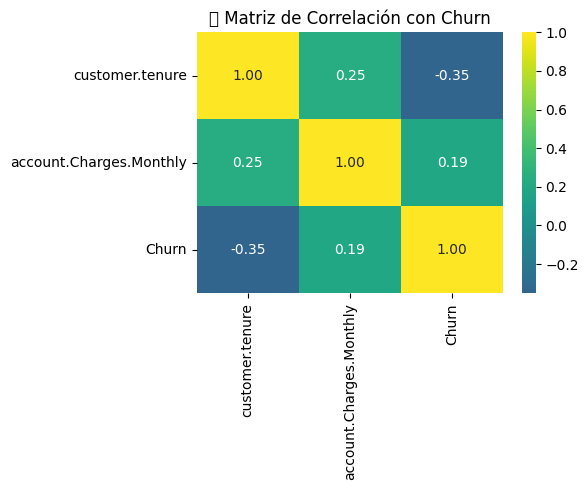

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title('üîç Matriz de Correlaci√≥n con Churn')
plt.tight_layout()
plt.show()

##Boxplot: Tiempo de contrato √ó Cancelaci√≥n


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


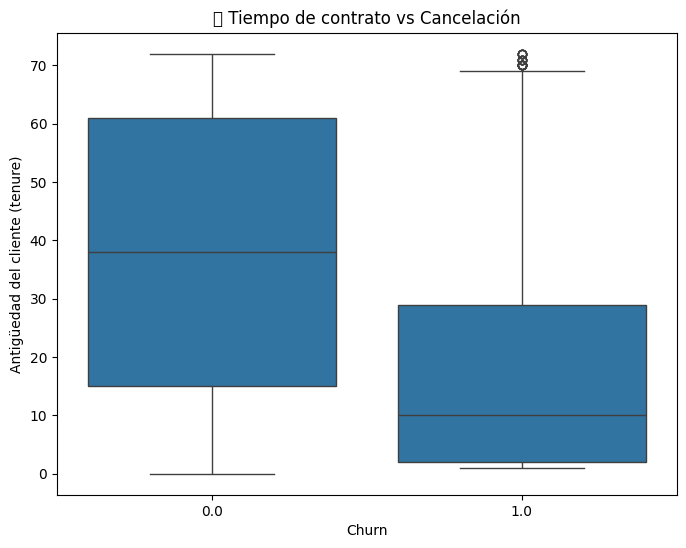

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tiempo de contrato vs Cancelaci√≥n')
plt.xlabel('Churn')
plt.ylabel('Antig√ºedad del cliente (tenure)')
plt.show()

##Boxplot: Gasto total √ó Cancelaci√≥n


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


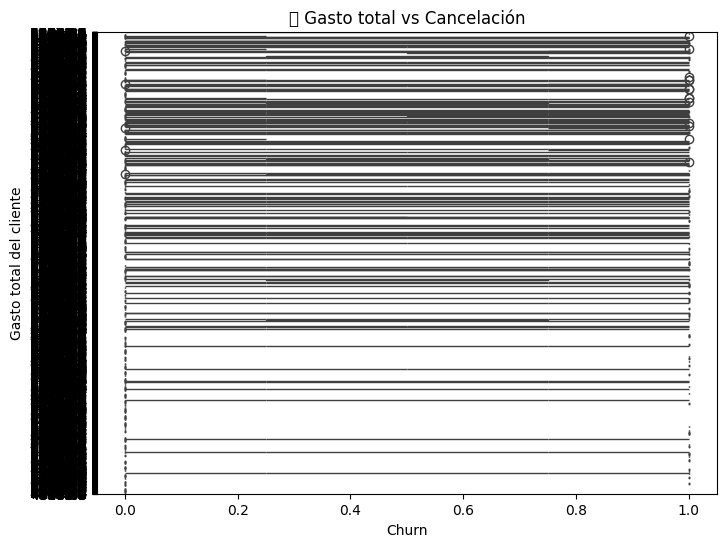

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Gasto total vs Cancelaci√≥n')
plt.xlabel('Churn')
plt.ylabel('Gasto total del cliente')
plt.show()

##Scatter plot: Tiempo de contrato vs Gasto total (coloreado por Churn)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


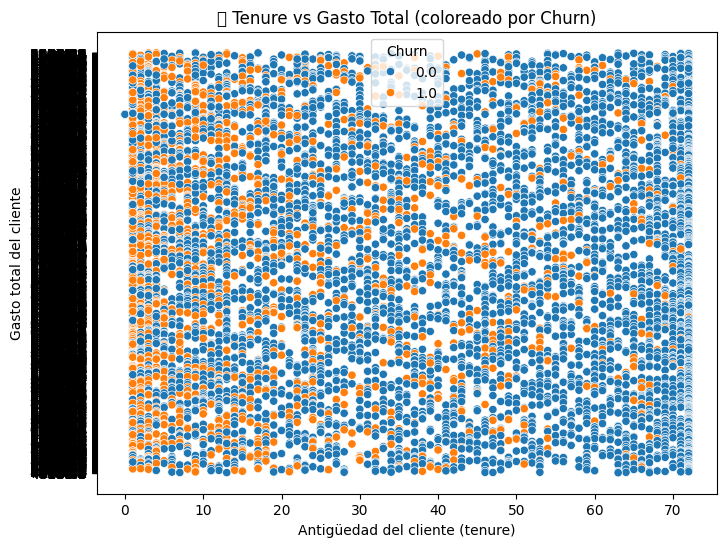

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df)
plt.title('üîÑ Tenure vs Gasto Total (coloreado por Churn)')
plt.xlabel('Antig√ºedad del cliente (tenure)')
plt.ylabel('Gasto total del cliente')
plt.legend(title='Churn')
plt.show()

In [88]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [89]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [91]:
df_clean = df_encoded.dropna(subset=['Churn'])
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

##RegresionLogistica

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline con normalizaci√≥n
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamiento
logistic_pipeline.fit(X_train, y_train)

# Evaluaci√≥n
y_pred_log = logistic_pipeline.predict(X_test)
print("üîç Regresi√≥n Log√≠stica")
print(classification_report(y_test, y_pred_log))

üîç Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1552
         1.0       0.63      0.40      0.49       561

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113



##Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluaci√≥n
y_pred_rf = rf_model.predict(X_test)
print("üå≤ Random Forest")
print(classification_report(y_test, y_pred_rf))

üå≤ Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.47      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



##Evaluacion de Modelos

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_pred_log = logistic_pipeline.predict(X_test)

# M√©tricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
conf_log = confusion_matrix(y_test, y_pred_log)

print("üîç Regresi√≥n Log√≠stica")
print(f"Accuracy: {acc_log:.2f}")
print(f"Precision: {prec_log:.2f}")
print(f"Recall: {rec_log:.2f}")
print(f"F1-score: {f1_log:.2f}")
print("Matriz de Confusi√≥n:\n", conf_log)

üîç Regresi√≥n Log√≠stica
Accuracy: 0.78
Precision: 0.63
Recall: 0.40
F1-score: 0.49
Matriz de Confusi√≥n:
 [[1420  132]
 [ 339  222]]


In [96]:
# Predicciones
y_pred_rf = rf_model.predict(X_test)

# M√©tricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)

print("üå≤ Random Forest")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print("Matriz de Confusi√≥n:\n", conf_rf)

üå≤ Random Forest
Accuracy: 0.79
Precision: 0.63
Recall: 0.47
F1-score: 0.53
Matriz de Confusi√≥n:
 [[1398  154]
 [ 300  261]]


##Regresi√≥n Log√≠stica ‚Äì Coeficientes


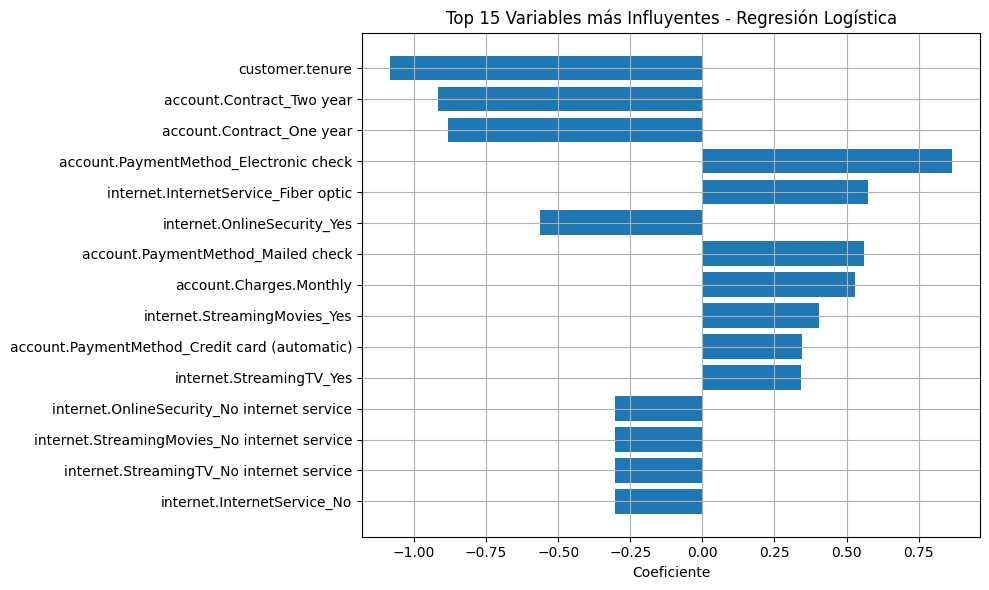

In [100]:
# Extraer coeficientes
logreg_model = logistic_pipeline.named_steps['logreg']
coefficients = logreg_model.coef_[0]

# DataFrame ordenado
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Top 15
top_log = coef_df.head(15)

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.barh(top_log['Feature'][::-1], top_log['Coefficient'][::-1])
plt.title('Top 15 Variables m√°s Influyentes - Regresi√≥n Log√≠stica')
plt.xlabel('Coeficiente')
plt.grid(True)
plt.tight_layout()
plt.show()

##Random Forest ‚Äì Importancia de Variables


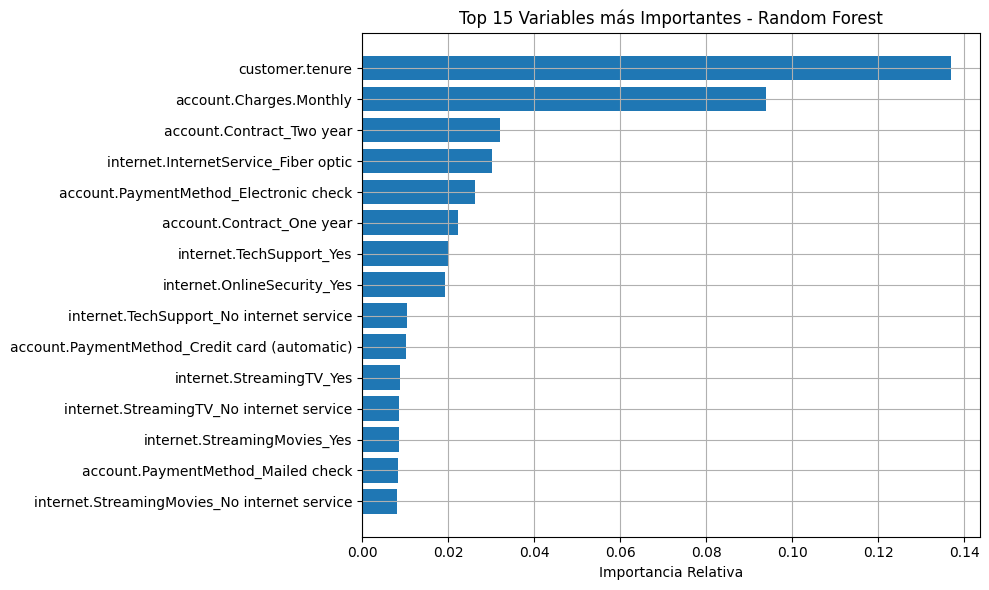

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancia de variables
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 15
top_rf = rf_df.head(15)

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.barh(top_rf['Feature'][::-1], top_rf['Importance'][::-1])
plt.title('Top 15 Variables m√°s Importantes - Random Forest')
plt.xlabel('Importancia Relativa')
plt.grid(True)
plt.tight_layout()
plt.show()


##Conlusion

#  Informe de Cancelaci√≥n de Clientes ‚Äì An√°lisis Predictivo

## 1.  Objetivo del an√°lisis
Identificar los principales factores que explican la cancelaci√≥n de clientes (`Churn`) en el banco, utilizando modelos de regresi√≥n log√≠stica y Random Forest, y proponer estrategias de retenci√≥n basadas en los resultados.

---

## 2.  Modelos utilizados

| Modelo                | M√©trica principal         | Interpretabilidad | Robustez ante no linealidad |
|----------------------|---------------------------|-------------------|-----------------------------|
| Regresi√≥n Log√≠stica  | Coeficientes (Odds Ratio) | Alta              | Baja                        |
| Random Forest        | Importancia de variables  | Media             | Alta                        |

Ambos modelos coinciden en los factores clave, pero Random Forest captura mejor interacciones no lineales y relaciones complejas.

---

## 3.  Principales factores que influyen en la cancelaci√≥n

### Variables m√°s influyentes (seg√∫n ambos modelos)

| Variable                          | Interpretaci√≥n                                                                 |
|-----------------------------------|--------------------------------------------------------------------------------|
| `customer.tenure`                | Clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar. |
| `account.Charges.Monthly`        | Gasto mensual elevado se asocia con mayor churn, especialmente sin beneficios. |
| `account.Contract_Two year`      | Contratos largos reducen significativamente la cancelaci√≥n.                    |
| `internet.Service_Fiber optic`   | Clientes con fibra √≥ptica presentan mayor churn (posible insatisfacci√≥n o costo). |
| `internet.OnlineSecurity_Yes`    | Servicios de seguridad reducen la probabilidad de cancelaci√≥n.                |
| `account.PaymentMethod_Electronic check` | Este m√©todo se asocia con mayor churn. Puede reflejar menor fidelizaci√≥n. |

---

## 4.  An√°lisis complementario

- `account.Charges.Total` no aporta valor predictivo adicional, ya que est√° altamente correlacionado con `customer.tenure`.
- Clientes con contratos mensuales y sin servicios adicionales son los m√°s propensos a cancelar.
- M√©todos de pago autom√°ticos (como tarjeta de cr√©dito) se asocian con menor churn.

---

## 5.  Estrategias de retenci√≥n recomendadas

###  Fidelizaci√≥n contractual
- Incentivar la migraci√≥n a contratos de 1 o 2 a√±os mediante descuentos o beneficios exclusivos.
- Ofrecer pruebas gratuitas de servicios adicionales (seguridad, soporte t√©cnico) al inicio del contrato.

###  Optimizaci√≥n del gasto mensual
- Identificar clientes con alto gasto mensual y bajo uso de servicios ‚Üí ofrecer paquetes personalizados.
- Implementar alertas de consumo y recomendaciones para optimizar el uso.

###  Intervenci√≥n temprana
- Crear un sistema de alerta para clientes con baja permanencia (<12 meses) y alto gasto ‚Üí contacto proactivo.
- Ofrecer encuestas de satisfacci√≥n y resoluci√≥n r√°pida de problemas en los primeros meses.

###  Incentivar m√©todos de pago autom√°ticos
- Promociones para clientes que adopten pagos autom√°ticos (descuentos, puntos de fidelidad).

---

## 6.  Recomendaciones para pr√≥ximos pasos

- Realizar segmentaci√≥n de clientes por perfil de riesgo de churn.
- Implementar modelos de scoring para priorizar intervenciones.
- Medir el impacto de las estrategias de retenci√≥n con A/B testing.

---
